In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [2]:
#Loading the API
IBMQ.load_account()

/tmp/ipykernel_179/397255005.py:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
/tmp/ipykernel_179/397255005.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
provider=IBMQ.get_provider("ibm-q")

In [9]:
#Loop to see the quantum computer with least job 
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    print(f"{backend.name()} : {backend.status().pending_jobs} & {qubit_count} qubits")

ibmq_qasm_simulator : 0 & simulated qubits
ibmq_lima : 44 & 5 qubits
ibmq_belem : 54 & 5 qubits
ibmq_quito : 40 & 5 qubits
simulator_statevector : 0 & simulated qubits
simulator_mps : 0 & simulated qubits
simulator_extended_stabilizer : 0 & simulated qubits
simulator_stabilizer : 0 & simulated qubits
ibmq_jakarta : 1190 & 7 qubits
ibmq_manila : 400 & 5 qubits
ibm_lagos : 799 & 7 qubits
ibm_nairobi : 1121 & 7 qubits
ibm_perth : 99 & 7 qubits


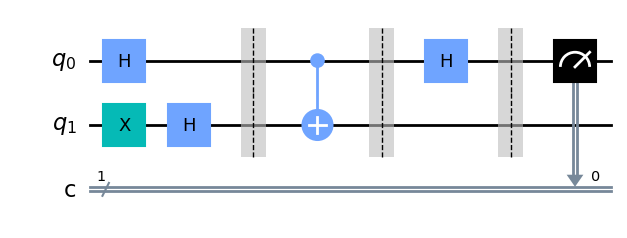

In [7]:
circuit=QuantumCircuit(2,1)
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.barrier()
circuit.cx(0,1)
circuit.barrier()
circuit.h(0)
circuit.barrier()
circuit.measure(0,0)
circuit.draw(output='mpl')

In [8]:
#Wait until job gets over
quantum_computer=provider.get_backend('ibmq_lima')
result=execute(circuit,backend=quantum_computer,shots=1024).result()

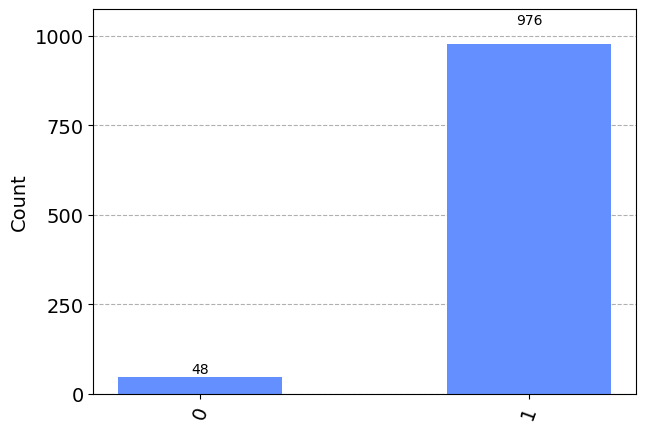

In [10]:
quantum_counts=result.get_counts(circuit)
plot_histogram([quantum_counts])